<a href="https://colab.research.google.com/github/zainabbio/Youtube-Tutorials/blob/main/Statistics_for_Genomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **How to summarize collection of data points: The idea behind statistical distributions**

In biology and other fields, experiments often involve some level of natural variation, making it impossible to get the same exact measurements every time.

For instance, if you are measuring gene expression for a gene like GAPDH, you'll see slight differences in the values even if the samples are similar.

This happens because of technical biases in the experiment or natural differences in the samples.

Instead of focusing on individual measurements, we typically describe the overall data in a way that captures the general trends or properties.

**1) Describing the central tendency: Mean and median**

In experiments, data points often vary around a central value, and we can summarize this data by calculating a measure that represents the general trend. This central value is called the "central tendency," and there are different ways to calculate it. The mean is one of the most common measures of central tendency.

The mean is calculated by adding up all the data points and dividing by the number of data points. For example, if you are measuring gene expression like for GAPDH, you would take the expression values from your experiments, add them together, and then divide by the total number of measurements. This gives you the average, or mean, value.

In R, you can use the mean() function to calculate the mean of a vector of numbers. In a real-world scenario, there are many more expression values than you can sample, so what you have is a "sample" of data points from a larger "population." The mean you calculate from this sample is a representation of the central tendency of the population, but it's based only on the data you

In [1]:
#create 10 random numbers from uniform distribution
x=runif(10)
# calculate mean
mean(x)

[1] 0.5340163

In [2]:
# **calculate median**
median(x)

[1] 0.5196622

**2) Describing the spread: Measurements of variation**

To understand how spread out or varied your data is, you can calculate the "variation" of the data. One simple way to describe variation is by looking at the range, which is the difference between the minimum and maximum values. In R, you can calculate the range of a dataset using the range() function.

However, a more common way to measure variation is to use "standard deviation" or "variance." These values tell you how far the data points are from the average. If the standard deviation or variance is close to zero, it means the data points are close to the mean (less variation). A higher value indicates the data points are more spread out (more variation).

Variance is calculated as the average of the squared differences between each data point and the mean.

In [3]:
x=rnorm(20,mean=6,sd=0.7)
var(x)

[1] 0.2997695

In [4]:
sd(x)

[1] 0.5475121

Variance can be influenced by outliers, as extreme values far from the mean can greatly affect it.

To reduce this influence, we can focus on where most of the data points lie, which is often measured using the interquartile range (IQR).

The IQR is the difference between the 75th and 25th percentiles, effectively removing extreme values.

In R, you can calculate the IQR with the IQR() function and find the quantiles with the quantile() function.

A boxplot visually represents this, with the box showing the 25th and 75th percentiles, and the median marked in the middle.

In [5]:
x=rnorm(20,mean=6,sd=0.7)
IQR(x)

[1] 0.9685544

In [6]:
quantile(x)

0%      25%      50%      75%     100% 
4.510988 5.358753 5.895137 6.327308 7.343341

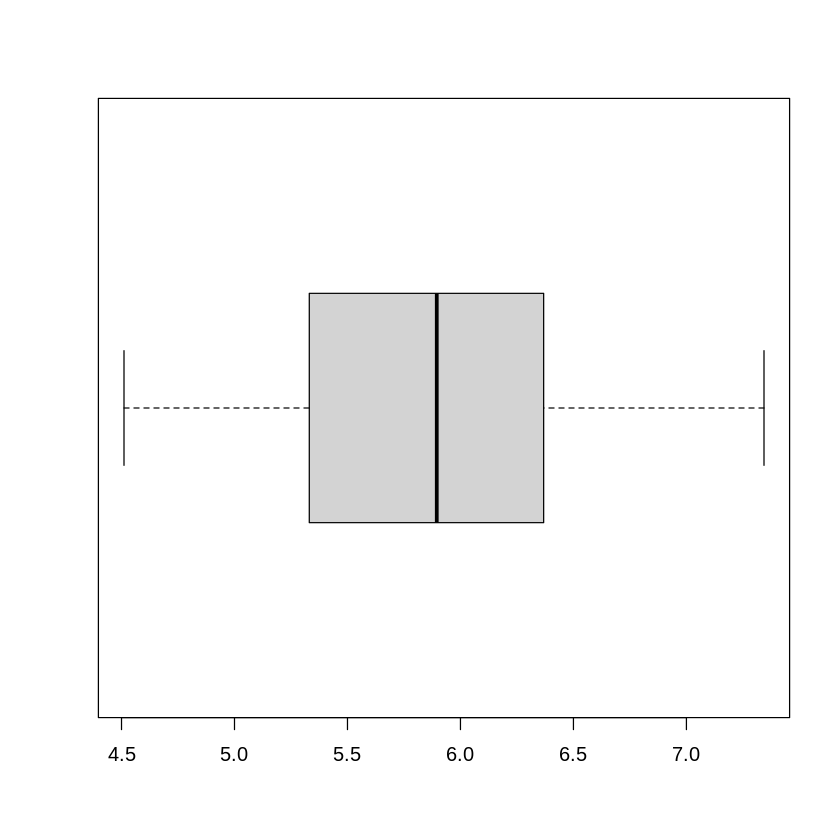

In [7]:
boxplot(x,horizontal = T)

**3) Frequently used statistical distributions**

Statistical distributions describe how data points are spread out and are defined by parameters like the mean and variance.

 One common distribution is the normal distribution, which looks like a "bell curve." It is characterized by the mean (the center) and the standard deviation (which controls how spread out the data is).

 In a normal distribution, most of the data points are close to the mean, with fewer points farther away.

 This means that if you randomly pick a data point from a normal distribution, it is more likely to be close to the mean than far from it.

 The probability of getting a value decreases as you move away from the mean.

In R, the family of *norm functions (rnorm,dnorm,qnorm and pnorm) can be used to operate with the normal distribution, such as calculating probabilities and generating random numbers drawn from a normal distribution. We show some of those capabilities below.

In [8]:
# get the value of probability density function when X= -2,
# where mean=0 and sd=2
dnorm(-2, mean=0, sd=2)

[1] 0.1209854

In [9]:
# get the probability of P(X =< -2) where mean=0 and sd=2
pnorm(-2, mean=0, sd=2)

[1] 0.1586553

In [10]:
# get the probability of P(X > -2) where mean=0 and sd=2
pnorm(-2, mean=0, sd=2,lower.tail = FALSE)

[1] 0.8413447

In [11]:
# get 5 random numbers from normal dist with  mean=0 and sd=2
rnorm(5, mean=0 , sd=2)

[1]  2.43053553  0.36474719  0.67708904 -0.02283644  0.97818371

In [12]:
# get y value corresponding to P(X > y) = 0.15 with  mean=0 and sd=2
qnorm( 0.15, mean=0 , sd=2)

[1] -2.072867

In R, there are many distribution functions that you can use for different statistical analyses. Each function requires specific parameters, such as the distribution's characteristics (mean, variance, etc.), and the type of output you want (e.g., critical values, quantiles, or random numbers). Here's a quick overview of some commonly used distribution functions:

**Normal Distribution:**

1) dnorm() – Density function (gives the height of the curve at a specific point).

2) pnorm() – Cumulative distribution function (gives the probability of values ≤ a certain value).

3) qnorm() – Quantile function (gives the value corresponding to a given probability).

4) rnorm() – Generates random numbers following a normal distribution.

**Binomial Distribution:**

1) dbinom() – Probability mass function (for the binomial distribution).

2) pbinom() – Cumulative distribution function for binomial.

3) qbinom() – Quantile function for binomial distribution.

4) rbinom() – Generates random numbers from a binomial distribution.

**Poisson Distribution:**

1) dpois() – Probability mass function for the Poisson distribution.

2) ppois() – Cumulative distribution function for Poisson.

3) qpois() – Quantile function for Poisson.

4) rpois() – Generates random numbers from a Poisson distribution.

These are just a few examples, but there are many more for other types of distributions, such as exponential, uniform, chi-square, etc. You can use these functions in R to work with various statistical distributions depending on your needs.

**4) Precision of estimates: Confidence intervals**

When we take a sample from a population and calculate a statistic like the mean, we're trying to estimate the population's mean.

However, we're not always sure how accurate our estimate is.

A confidence interval helps by providing a range of values that likely contains the true population mean.

Since we often don’t have access to the entire population, we can use bootstrap resampling to estimate this range.

The idea is to repeatedly take random samples (with replacement) from the original sample, calculate the mean for each sample, and repeat this many times (e.g., 1000 times).

From these means, we can determine the 2.5th and 97.5th percentiles, which form a 95% confidence interval. This method helps estimate how precise our sample mean is.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggridges’, ‘labelled’, ‘ggformula’, ‘mosaicData’, ‘mosaicCore’


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following objects are masked from ‘package:dplyr’:

    count, do, tally


The following object is masked from ‘package:Matrix’:

    mean


The following object is masked from ‘package:ggplot2’:

    stat


The following objects are masked from ‘package:stats’:

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


The following objects are masked from ‘package:base’:

    max, mean, min, prod, range, sample, sum




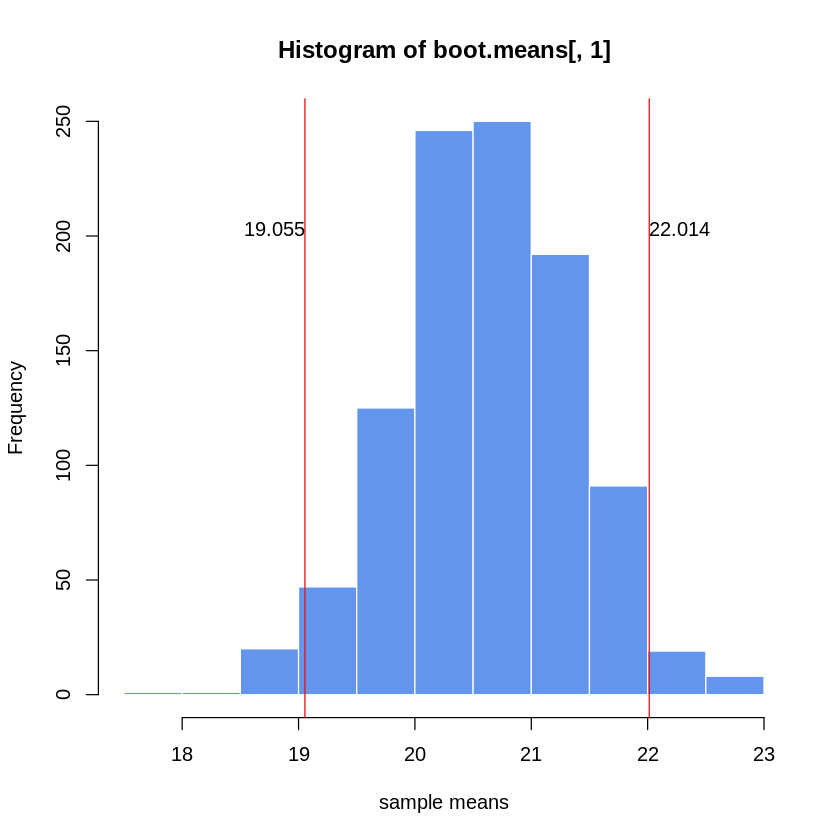

In [14]:
install.packages("mosaic")
library(mosaic)
set.seed(21)
sample1= rnorm(50,20,5) # simulate a sample

# do bootstrap resampling, sampling with replacement
boot.means=do(1000) * mean(resample(sample1))

# get percentiles from the bootstrap means
q=quantile(boot.means[,1],p=c(0.025,0.975))

# plot the histogram
hist(boot.means[,1],col="cornflowerblue",border="white",
                    xlab="sample means")
abline(v=c(q[1], q[2] ),col="red")
text(x=q[1],y=200,round(q[1],3),adj=c(1,0))
text(x=q[2],y=200,round(q[2],3),adj=c(0,0))

In R, we can use the qnorm() function to calculate the values needed for confidence intervals. When we compare the results from the Central Limit Theorem (CLT) and bootstrap resampling, we find they are very similar. For example, the confidence interval from the bootstrap method was [19.21, 21.99], and from CLT, it was [19.24, 22.01]. Both methods give almost the same result for the same data.

In [15]:
alpha=0.05
sd=5
n=50
mean(sample1)+qnorm(c(alpha/2,1-alpha/2))*sd/sqrt(n)

[1] 19.23638 22.00819

# **How to test for differences between samples**

When comparing two sets of samples, like wild-type vs mutants or healthy vs disease samples, we need to account for natural variation in the data.

We can't just look at the difference in means, because small differences could be due to random chance.

To determine if the difference is real, we use hypothesis testing.

This involves two key steps: first, we set up a null hypothesis (H₀) that there is no difference between the samples, and an alternative hypothesis (H₁) that there is a difference.

Next, we calculate a test statistic and compare it to a reference value (P-value) to see if the difference is statistically significant.

If the P-value is small enough, we reject the null hypothesis and conclude there is a real difference

**1) Randomization-based testing for difference of the means**

Randomization-based testing is a simple way to check if there's a real difference between two samples. If we assume there’s no difference (the null hypothesis), we can randomly shuffle the sample labels and calculate the difference in means each time. By doing this many times, we create a "null distribution" that shows what differences we might expect just by chance. Then, we compare the actual difference we observed to this null distribution to see how unlikely it is. If the actual difference is very rare in the shuffled samples, we can conclude that it’s probably a real difference. This method helps us test the hypothesis without making strong assumptions.

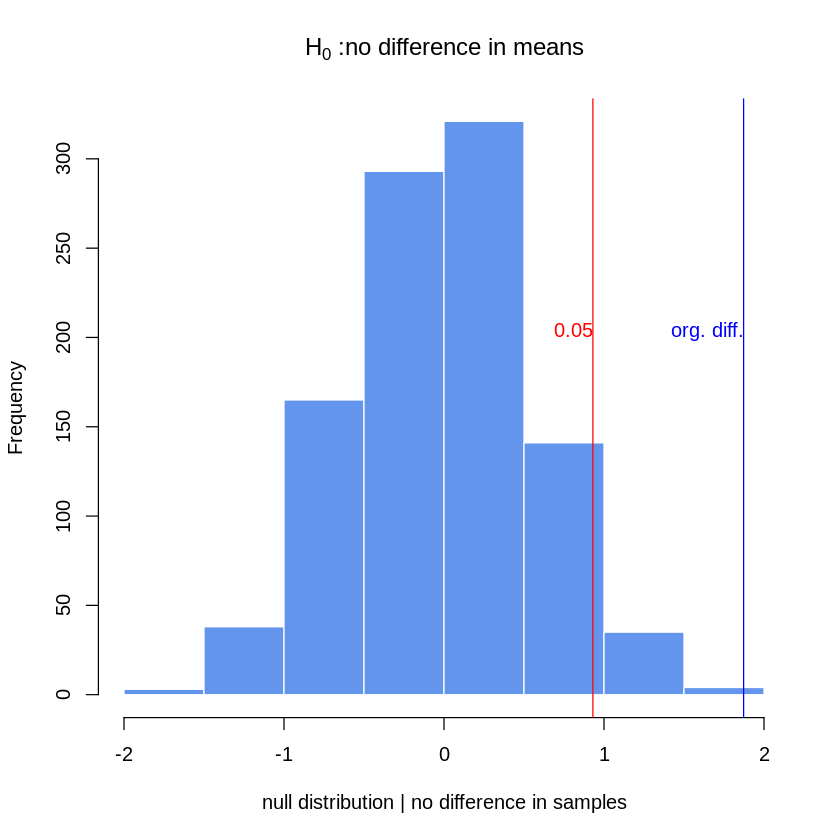

In [16]:
set.seed(100)
gene1=rnorm(30,mean=4,sd=2)
gene2=rnorm(30,mean=2,sd=2)
org.diff=mean(gene1)-mean(gene2)
gene.df=data.frame(exp=c(gene1,gene2),
                  group=c( rep("test",30),rep("control",30) ) )


exp.null <- do(1000) * diff(mosaic::mean(exp ~ shuffle(group), data=gene.df))
hist(exp.null[,1],xlab="null distribution | no difference in samples",
     main=expression(paste(H[0]," :no difference in means") ),
     xlim=c(-2,2),col="cornflowerblue",border="white")
abline(v=quantile(exp.null[,1],0.95),col="red" )
abline(v=org.diff,col="blue" )
text(x=quantile(exp.null[,1],0.95),y=200,"0.05",adj=c(1,0),col="red")
text(x=org.diff,y=200,"org. diff.",adj=c(1,0),col="blue")

In [17]:
p.val=sum(exp.null[,1]>org.diff)/length(exp.null[,1])
p.val

[1] 0.001

After performing random permutations and creating a null distribution, we can calculate a confidence interval for the difference in means. This is done by finding the 2.5th and 97.5th percentiles of the null distribution. This confidence interval is closely related to the P-value calculation, as it helps us determine how extreme our observed difference is compared to what we would expect by chance.

**2) Using t-test for difference of the means between two samples**

A t-test is a statistical test used to compare the means of two groups to see if they are significantly different. It assumes that the differences between groups follow a t-distribution and is based on the Central Limit Theorem. The t-test is often used when there are fewer data points, as it is quicker and less computationally intensive than randomization tests.

In [18]:
# Welch's t-test
stats::t.test(gene1,gene2)


	Welch Two Sample t-test

data:  gene1 and gene2
t = 3.7653, df = 47.552, p-value = 0.0004575
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.872397 2.872761
sample estimates:
mean of x mean of y 
 4.057728  2.185149 


In [19]:
# t-test with equal variance assumption
stats::t.test(gene1,gene2,var.equal=TRUE)


	Two Sample t-test

data:  gene1 and gene2
t = 3.7653, df = 58, p-value = 0.0003905
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8770753 2.8680832
sample estimates:
mean of x mean of y 
 4.057728  2.185149 


T-tests assume normality in the population, but they can still work well even with deviations from normality, especially when the distributions are similarly skewed. This is because, according to the Central Limit Theorem, sample means will be normally distributed if the sample size is large enough.

**3) Multiple testing correction**

In hypothesis testing, we sometimes make mistakes: false positives (type I errors), where we wrongly think something is significant, and false negatives (type II errors), where we miss something important. Specificity measures how well we avoid false positives, and sensitivity (or "power") measures how well we detect true positives. A more powerful test has higher sensitivity, which means fewer false negatives. The power of a test increases with a larger sample size and bigger effect sizes, making it easier to detect true differences. Multiple testing corrections help control false positives when performing many tests.

In R, the base function p.adjust() implements most of the p-value correction methods described above. For the q-value, we can use the qvalue package from Bioconductor. Below we demonstrate how to use them on a set of simulated p-values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'BiocVersion'

Old packages: 'data.table', 'processx'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'qvalue'

also installing the dependencies ‘plyr’, ‘reshape2’


Old packages: 'data.table', 'processx'



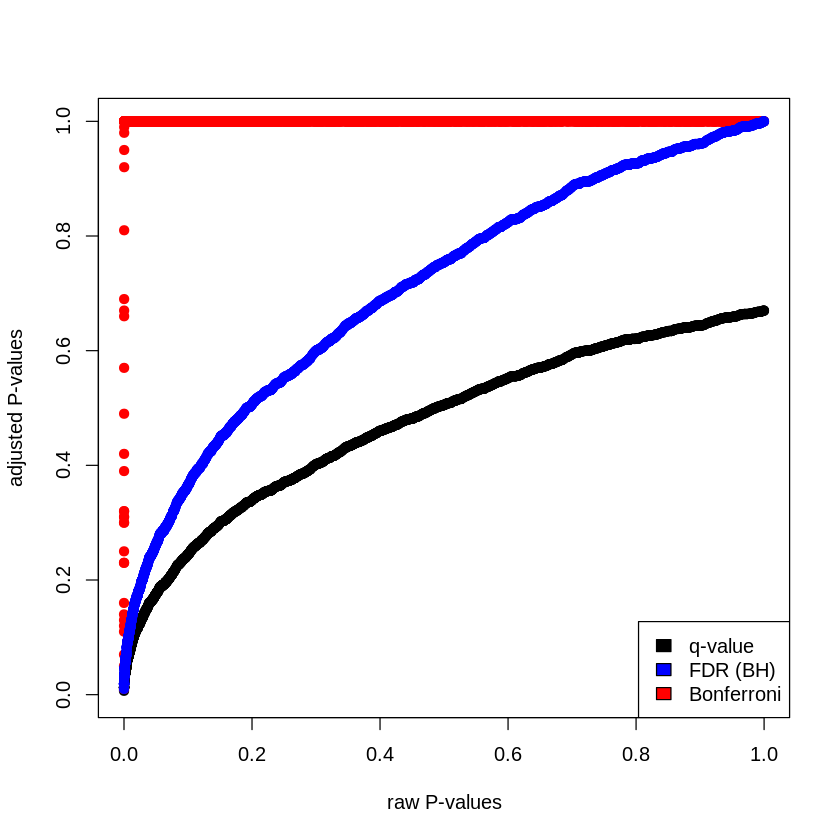

In [22]:
install.packages("BiocManager")
BiocManager::install()
BiocManager::install("qvalue")
library(qvalue)
data(hedenfalk)

qvalues <- qvalue(hedenfalk$p)$q
bonf.pval=p.adjust(hedenfalk$p,method ="bonferroni")
fdr.adj.pval=p.adjust(hedenfalk$p,method ="fdr")

plot(hedenfalk$p,qvalues,pch=19,ylim=c(0,1),
     xlab="raw P-values",ylab="adjusted P-values")
points(hedenfalk$p,bonf.pval,pch=19,col="red")
points(hedenfalk$p,fdr.adj.pval,pch=19,col="blue")
legend("bottomright",legend=c("q-value","FDR (BH)","Bonferroni"),
       fill=c("black","blue","red"))

**4) Moderated t-tests: Using information from multiple comparisons**

In genomics, we often perform many tests, not just one, because we have a large number of genes to analyze. To improve the accuracy of these tests, we can use information from all the tests to help adjust the results of individual tests. For example, when calculating variances (a measure of how spread out the data is) for thousands of genes, we can adjust each gene's variance to be closer to the average or typical variance. This process is called "moderated t-tests" or "shrinkage t-tests." One method, used by software like Limma, involves "Empirical Bayes methods," where we combine the variability of each gene with background knowledge (like the variability of other genes) to get a better estimate of the gene’s variance. This helps improve the reliability of our significance testing and makes the results more accurate.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘matrixStats’


The following objects are masked from ‘package:mosaic’:

    count, iqr


The following object is masked from ‘package:dplyr’:

    count




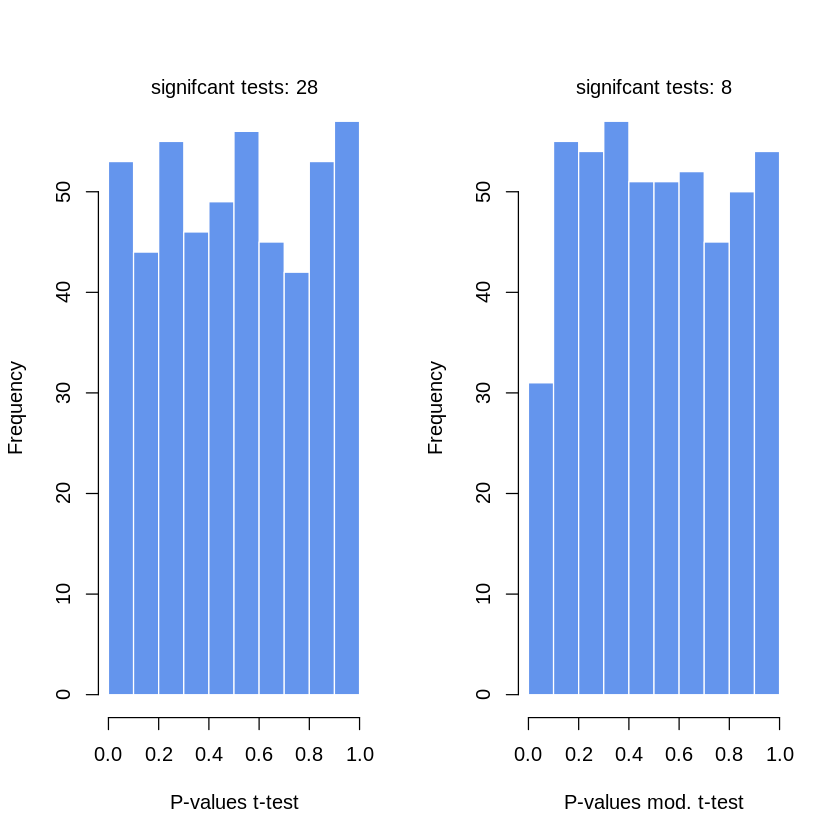

In [24]:
install.packages("matrixStats")
library(matrixStats)
set.seed(100)

#sample data matrix from normal distribution

gset=rnorm(3000,mean=200,sd=70)
data=matrix(gset,ncol=6)

# set groups
group1=1:3
group2=4:6
n1=3
n2=3
dx=rowMeans(data[,group1])-rowMeans(data[,group2])

require(matrixStats)

# get the esimate of pooled variance
stderr = sqrt( (rowVars(data[,group1])*(n1-1) +
       rowVars(data[,group2])*(n2-1)) / (n1+n2-2) * ( 1/n1 + 1/n2 ))

# do the shrinking towards median
mod.stderr = (stderr + median(stderr)) / 2 # moderation in variation

# esimate t statistic with moderated variance
t.mod <- dx / mod.stderr

# calculate P-value of rejecting null
p.mod = 2*pt( -abs(t.mod), n1+n2-2 )

# esimate t statistic without moderated variance
t = dx / stderr

# calculate P-value of rejecting null
p = 2*pt( -abs(t), n1+n2-2 )

par(mfrow=c(1,2))
hist(p,col="cornflowerblue",border="white",main="",xlab="P-values t-test")
mtext(paste("signifcant tests:",sum(p<0.05))  )
hist(p.mod,col="cornflowerblue",border="white",main="",
     xlab="P-values mod. t-test")
mtext(paste("signifcant tests:",sum(p.mod<0.05))  )

**Some Other Statistical Test**

**1) ANOVA (Analysis of Variance)**

ANOVA is used to compare the means across multiple groups. It’s helpful when you want to test for differences between more than two groups, like comparing gene expression across multiple conditions.

In [25]:
# Simulated data for three groups
group1 <- rnorm(30, mean = 10, sd = 2)
group2 <- rnorm(30, mean = 15, sd = 2)
group3 <- rnorm(30, mean = 20, sd = 2)

# Combine into one dataframe
data <- data.frame(
  value = c(group1, group2, group3),
  group = factor(rep(c("Group1", "Group2", "Group3"), each = 30))
)

# Perform ANOVA
anova_result <- aov(value ~ group, data = data)
summary(anova_result)

            Df Sum Sq Mean Sq F value Pr(>F)    
group        2 1771.8   885.9   335.6 <2e-16 ***
Residuals   87  229.6     2.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**2) Chi-Square Test**

The chi-square test is used to determine if there is a significant association between two categorical variables. It can be used in genomics to see if two genetic traits are associated.

In [26]:
# Simulated data for two categorical variables
gene_expression <- c(30, 45, 15, 10)  # Gene expression (e.g., presence/absence)
group <- c(1, 1, 2, 2)  # Group membership (e.g., healthy or diseased)

# Create a contingency table
table_data <- matrix(gene_expression, nrow = 2, byrow = TRUE)

# Perform Chi-Square Test
chi_square_result <- chisq.test(table_data)
print(chi_square_result)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table_data
X-squared = 2.2761, df = 1, p-value = 0.1314



**3)  Fisher's Exact Test**

Fisher's exact test is used to examine the association between two categorical variables, especially when sample sizes are small. It's useful when comparing gene mutation rates across groups.

In [27]:
# Simulated data
gene_mutation <- matrix(c(5, 3, 2, 4), nrow = 2)

# Perform Fisher's Exact Test
fisher_result <- fisher.test(gene_mutation)
print(fisher_result)


	Fisher's Exact Test for Count Data

data:  gene_mutation
p-value = 0.5921
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.2418801 55.2697930
sample estimates:
odds ratio 
  3.043639 



**4) Benjamini-Hochberg (FDR) Correction**

The Benjamini-Hochberg correction controls for false discovery rate (FDR) when performing multiple hypothesis tests. This is commonly used in genomics when you perform many tests, like comparing gene expression across hundreds or thousands of genes.

In [28]:
# Simulated p-values
p_values <- runif(1000, min = 0, max = 1)

# Perform FDR correction
fdr_result <- p.adjust(p_values, method = "fdr")
print(fdr_result)

   [1] 0.9864032 0.9957896 0.9621335 0.9735026 0.9864032 0.9957896 0.9764736
   [8] 0.9864032 0.9621335 0.9764736 0.9621335 0.7709020 0.9957896 0.9735026
  [15] 0.9735026 0.9864032 0.9804036 0.9957896 0.9957896 0.9077928 0.9611664
  [22] 0.9957896 0.9864032 0.9621335 0.9398984 0.9735026 0.9957896 0.9735026
  [29] 0.9621335 0.9735026 0.9957896 0.9804036 0.9764736 0.9664158 0.9398984
  [36] 0.9957896 0.9735026 0.9188307 0.9688746 0.9764736 0.9879130 0.9764736
  [43] 0.9957896 0.9467948 0.9077928 0.9398984 0.9957896 0.9957896 0.9957896
  [50] 0.9957896 0.9735026 0.9621335 0.9993015 0.9077928 0.9621335 0.9804036
  [57] 0.9077928 0.9764736 0.9077928 0.9077928 0.9735026 0.9957896 0.9957896
  [64] 0.9688746 0.9957896 0.9077928 0.9957896 0.9644026 0.9735026 0.9077928
  [71] 0.9804036 0.9957896 0.9664158 0.9621335 0.9664158 0.9077928 0.9688746
  [78] 0.9077928 0.9957896 0.9077928 0.9764736 0.9398984 0.9957896 0.9993015
  [85] 0.9436340 0.9177551 0.9864032 0.9764736 0.9077928 0.9398984 0.9957896

**5) Paired t-Test**

The paired t-test compares the means of two related groups. This test is used when you have two measurements from the same group (e.g., pre-treatment vs. post-treatment).

In [29]:
# Simulated data (before and after treatment)
before <- rnorm(30, mean = 8, sd = 1)
after <- rnorm(30, mean = 9, sd = 1)

# Perform paired t-test
paired_t_test <- t.test(before, after, paired = TRUE)
print(paired_t_test)


	Paired t-test

data:  before and after
t = -4.4058, df = 29, p-value = 0.0001317
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -1.6899294 -0.6183823
sample estimates:
mean difference 
      -1.154156 



**6) Levene's Test for Homogeneity of Variance**

Levene’s test checks if the variances of multiple groups are equal (homogeneity of variance). It is commonly used as a prerequisite for ANOVA.

In [31]:
# Simulated data for three groups
group1 <- c(1.1, 2.3, 3.4, 5.6, 6.1)
group2 <- c(2.3, 2.8, 3.7, 3.0, 4.5)
group3 <- c(3.8, 4.3, 5.7, 6.1, 7.2)

# Combine into one dataframe
data <- data.frame(
  value = c(group1, group2, group3),
  group = factor(rep(c("Group1", "Group2", "Group3"), each = 5))
)

# Perform Levene's Test for Homogeneity of Variance
install.packages("car")
library(car)
levene_result <- leveneTest(value ~ group, data = data)
print(levene_result)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:mosaic’:

    deltaMethod, logit


The following object is masked from ‘package:dplyr’:

    recode




Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  2  1.8723  0.196
      12               


**7) Cox Proportional Hazards Test**

The Cox Proportional Hazards test is used in survival analysis. It evaluates the relationship between the survival time of individuals and one or more predictor variables (e.g., gene expression, clinical data).

In [32]:
# Simulated data for survival analysis
library(survival)
surv_data <- data.frame(
  time = c(5, 8, 7, 12, 9),
  status = c(1, 1, 0, 1, 0),
  gene_expression = c(2.5, 3.6, 4.1, 2.9, 5.7)
)

# Fit a Cox Proportional Hazards Model
cox_model <- coxph(Surv(time, status) ~ gene_expression, data = surv_data)
summary(cox_model)

Call:
coxph(formula = Surv(time, status) ~ gene_expression, data = surv_data)

  n= 5, number of events= 3 

                   coef exp(coef) se(coef)      z Pr(>|z|)
gene_expression -1.1724    0.3096   1.2876 -0.911    0.363

                exp(coef) exp(-coef) lower .95 upper .95
gene_expression    0.3096       3.23   0.02482     3.862

Concordance= 0.833  (se = 0.188 )
Likelihood ratio test= 1.53  on 1 df,   p=0.2
Wald test            = 0.83  on 1 df,   p=0.4
Score (logrank) test = 1.12  on 1 df,   p=0.3


**8) Correlation Test (Spearman's Rank)**

Spearman’s rank correlation test is a non-parametric test used to measure the strength and direction of the association between two ranked variables. It's useful when the data doesn’t follow a linear relationship or is not normally distributed.

In [33]:
# Simulated data for two variables
var1 <- c(2, 4, 6, 8, 10)
var2 <- c(1, 3, 5, 7, 9)

# Perform Spearman’s rank correlation test
spearman_result <- cor.test(var1, var2, method = "spearman")
print(spearman_result)


	Spearman's rank correlation rho

data:  x and y
S = 4.4409e-15, p-value = 0.01667
alternative hypothesis: true rho is not equal to 0
sample estimates:
rho 
  1 



**9) Wald Test**

The Wald test is used to assess the significance of coefficients in statistical models, especially in logistic regression and generalized linear models (GLMs).

In [36]:
# Simulated data for logistic regression
data <- data.frame(
  outcome = c(0, 1, 0, 1, 0, 1, 0, 1),
  predictor = c(2.3, 4.5, 2.8, 6.1, 3.3, 5.4, 2.9, 4.8)
)

# Fit a logistic regression model
logit_model <- glm(outcome ~ predictor, family = binomial, data = data)

# Perform Wald test
install.packages("sandwich")
install.packages("lmtest")
library(sandwich)
library(lmtest)
wald_test_result <- coeftest(logit_model, vcov = vcovHC(logit_model, type = "HC1"))
print(wald_test_result)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





z test of coefficients:

             Estimate Std. Error z value  Pr(>|z|)    
(Intercept) -149.3263     5.3696 -27.810 < 2.2e-16 ***
predictor     38.2803     1.3608  28.131 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



**10) Mantel Test**

The Mantel test is a permutation test used to test the correlation between two distance matrices. It is often used in ecology and genomics for analyzing relationships between genetic and geographical distance matrices.

In [38]:
# Simulated distance matrices
matrix1 <- matrix(runif(9), nrow = 3)
matrix2 <- matrix(runif(9), nrow = 3)

# Perform Mantel Test
install.packages("vegan")
library(vegan)
mantel_result <- mantel(matrix1, matrix2)
print(mantel_result)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘permute’


Loading required package: permute


Attaching package: ‘permute’


The following object is masked from ‘package:mosaic’:

    shuffle


'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.




Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = matrix1, ydis = matrix2) 

Mantel statistic r: -0.7349 
      Significance: 1 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.965 0.968 0.970 0.971 
Permutation: free
Number of permutations: 5



**11) Friedman Test**

The Friedman test is a non-parametric test used to detect differences in treatments across multiple test attempts. It is used when there are repeated measures or matched groups, and you want to compare more than two groups.

In [39]:
# Simulated data for three treatments over three time points
treatment1 <- c(5, 8, 6, 7)
treatment2 <- c(6, 9, 8, 7)
treatment3 <- c(7, 10, 9, 8)

# Combine into one dataframe
data <- data.frame(
  value = c(treatment1, treatment2, treatment3),
  treatment = factor(rep(c("Treatment1", "Treatment2", "Treatment3"), each = 4)),
  subject = rep(1:4, times = 3)
)

# Perform Friedman Test
friedman_result <- friedman.test(value ~ treatment | subject, data = data)
print(friedman_result)


	Friedman rank sum test

data:  value and treatment and subject
Friedman chi-squared = 7.6, df = 2, p-value = 0.02237



 **12) Multivariate Analysis of Variance (MANOVA)**

MANOVA is an extension of ANOVA to accommodate multiple dependent variables. It is used when you have more than one response variable and want to examine if the means of these variables differ across groups.

In [40]:
# Simulated data for two response variables and three groups
group1 <- cbind(rnorm(10, 5, 2), rnorm(10, 6, 2))
group2 <- cbind(rnorm(10, 6, 2), rnorm(10, 7, 2))
group3 <- cbind(rnorm(10, 7, 2), rnorm(10, 8, 2))

# Combine into one dataframe
data <- data.frame(
  value1 = c(group1[,1], group2[,1], group3[,1]),
  value2 = c(group1[,2], group2[,2], group3[,2]),
  group = factor(rep(c("Group1", "Group2", "Group3"), each = 10))
)

# Perform MANOVA
manova_result <- manova(cbind(value1, value2) ~ group, data = data)
summary(manova_result)

          Df  Pillai approx F num Df den Df Pr(>F)
group      2 0.23379    1.787      4     54 0.1449
Residuals 27                                      

These additional tests should give you a comprehensive list of statistical methods commonly used in genomics.